In [1]:
import numpy as np # for generating dataset 
np.set_printoptions(suppress=True) # disable scientific notation 

from sklearn import linear_model # for model 

# for displaying graphs
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
NUM_INPUTS = 50 # number of inputs per class
# average values for feature-class pairs 
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0

# generate data randomly with a normal distribution centered around the averages
plant_a_heights = np.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plant_a_widths = np.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)
plant_b_heights = np.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plant_b_widths = np.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

# create a 2-dimensional matrix with heights in the first column and widths in the second
plant_inputs = list(zip(np.append(plant_a_heights, plant_b_heights), np.append(plant_a_widths, plant_b_widths)))

# generate expected values, when creating input data the first half was of one class, the second half the other, so the first half are 0s and the second half are 1s
expected = [0]*NUM_INPUTS + [1]*NUM_INPUTS

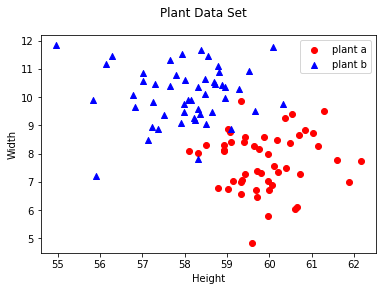

In [3]:
fig = plt.figure() # create figure 
fig.suptitle('Plant Data Set') # set title 
plt.xlabel('Height') # label x axis 
plt.ylabel('Width') # label y axis 
a_scatter = plt.scatter(plant_a_heights, plant_a_widths, c="red", marker="o", label='plant a') # scatter plant a datapoints
b_scatter = plt.scatter(plant_b_heights, plant_b_widths, c="blue", marker="^", label='plant b') # scatter plant b datapoints
plt.legend(handles=[a_scatter, b_scatter]) # add a legend 
plt.show() # show the graph

In [4]:
model = linear_model.LogisticRegression() # create logistic regression model
model.fit(plant_inputs, expected) # fit model  
print('Intercept: {0}  Coefficients: {1}'.format(model.intercept_, model.coef_)) # print fit to console 

Intercept: [82.86343719]  Coefficients: [[-1.71794209  2.06199627]]


In [5]:
# generate a test data point for both plant a and b 
test_a_height = np.random.normal(loc=PLANT_A_AVG_HEIGHT)
test_a_width = np.random.normal(loc=PLANT_A_AVG_WIDTH)
test_b_height = np.random.normal(loc=PLANT_B_AVG_HEIGHT)
test_b_width = np.random.normal(loc=PLANT_B_AVG_WIDTH)

test_inputs = [[test_a_height, test_a_width], [test_b_height, test_b_width]] # put values into a matrix in the desired format 

# print out the outputs for these new inputs
print('Class predictions: {0}'.format(model.predict(test_inputs))) # predict each class, expected output should be [0 1] 
print('Probabilities:\n{0}'.format(model.predict_proba(test_inputs))) # print probability for each class 

Class predictions: [0 1]
Probabilities:
[[0.99881584 0.00118416]
 [0.00259357 0.99740643]]


# Exercise Option #1 - Standard Difficulty
1. The expected output should be [0 1], because two test datapoints were generated, one for each class. If the model didn't predict this correctly, that means that the generated datapoints were likely in the overlap of the two classes. 
2. The higher probability is the class prediction. The model sould be more or less confident depending on how close the datapoint is to the average for that class. 
3. As seen below, I decreased the gap between the average values by 0.5. When looking at the graph, you can see that there is more overlap between the two classes. The predictions are still correct, but due to the classes having a lot more overlap, the probabilities of the correct predictions decreased. 
4. If a coefficient is negative, that means that if you took a datapoint and increased the value of a feature that has a negative coeficcient, the probability the model outputs for that class should decrease. Typically, the # of rows of the coefficient array should = the # of classes, and the # of collumns should = the number of features, but that is not the case for this model. That is because having two classes to predict effectively is the same as having one class to predict, so only 1 row is needed. 

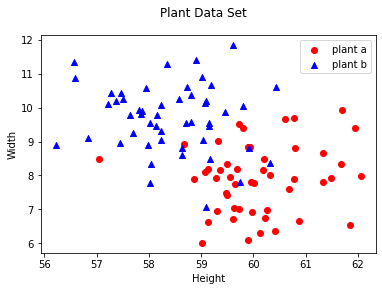

Intercept: [82.86343719]  Coefficients: [[-1.71794209  2.06199627]]
Class predictions: [0 1]
Probabilities:
[[0.97482514 0.02517486]
 [0.38942842 0.61057158]]


In [6]:
# Rerun all the code, except with the average values even closer. 

NEW_PLANT_A_AVG_HEIGHT = 60.0
NEW_PLANT_A_AVG_WIDTH = 8.0
NEW_PLANT_B_AVG_HEIGHT = 58.5
NEW_PLANT_B_AVG_WIDTH = 9.5
new_plant_a_heights = np.random.normal(loc=NEW_PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
new_plant_a_widths = np.random.normal(loc=NEW_PLANT_A_AVG_WIDTH, size=NUM_INPUTS)
new_plant_b_heights = np.random.normal(loc=NEW_PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
new_plant_b_widths = np.random.normal(loc=NEW_PLANT_B_AVG_WIDTH, size=NUM_INPUTS)
new_plant_inputs = list(zip(np.append(new_plant_a_heights, new_plant_b_heights), np.append(new_plant_a_widths, new_plant_b_widths)))
new_fig = plt.figure() 
new_fig.suptitle('Plant Data Set')
plt.xlabel('Height')
plt.ylabel('Width') 
new_a_scatter = plt.scatter(new_plant_a_heights, new_plant_a_widths, c="red", marker="o", label='plant a')
new_b_scatter = plt.scatter(new_plant_b_heights, new_plant_b_widths, c="blue", marker="^", label='plant b') 
plt.legend(handles=[new_a_scatter, new_b_scatter]) 
plt.show()
new_model = linear_model.LogisticRegression()
new_model.fit(plant_inputs, expected)   
print('Intercept: {0}  Coefficients: {1}'.format(new_model.intercept_, new_model.coef_))
new_test_a_height = np.random.normal(loc=NEW_PLANT_A_AVG_HEIGHT)
new_test_a_width = np.random.normal(loc=NEW_PLANT_A_AVG_WIDTH)
new_test_b_height = np.random.normal(loc=NEW_PLANT_B_AVG_HEIGHT)
new_test_b_width = np.random.normal(loc=NEW_PLANT_B_AVG_WIDTH)
new_test_inputs = [[new_test_a_height, new_test_a_width], [new_test_b_height, new_test_b_width]]
print('Class predictions: {0}'.format(new_model.predict(new_test_inputs)))
print('Probabilities:\n{0}'.format(new_model.predict_proba(new_test_inputs))) 

# Exercise Option #2 - Advanced Difficulty

As seen below, to try to show model fit, I graphed the dataset against the predictions of the model. If you look at the graph, it seems like the model only incorrectly predicted 5 datapoints.

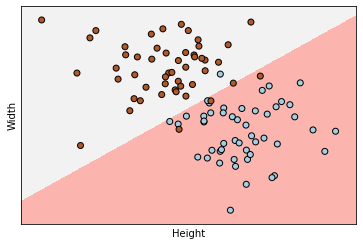

In [7]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py
# Got help from Huxley for this. 

X = np.asarray(plant_inputs) # input data, converted to numpy array 
Y = np.asarray(expected) # expected values of input data, converted to numpy array 
x1 = X[:,0] # datapoints with only first feature (out of two total features)
x2 = X[:,1] # datapoints with only second feature (out of two total features)

# get the min and max values of dataset, with 0.5 padding added 
x_min, x_max = x1.min()-0.5, x1.max()+0.5
y_min, y_max = x2.min()-0.5, x2.max()+0.5
step = .01  # step size in the mesh

# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
# https://numpy.org/doc/stable/reference/generated/numpy.c_.html
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure() # make figure 
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.pcolormesh(xx, yy, Z, cmap='Pastel1', shading='auto')

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(x1, x2, c=Y, edgecolors='black', cmap=plt.cm.Paired) # plot all the training points with their expected colors
plt.xlabel('Height') # label x-axis
plt.ylabel('Width') # label y-axis

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html
plt.xlim(x_min, x_max) # set min and max of x-axis
plt.ylim(y_min, y_max) # set min and max of y-axis

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xticks(()) # remove ticks on x-axis
plt.yticks(()) # remove ticks on y-axis

plt.show() # show figure 

# Exercise Option #3 - Advanced Difficulty

As seen below, I implemented my own custom one vs. rest and compared it against scikit-learn automatically doing it. The predictions ended up being the same, but the probabilities were slightly different.

In [8]:
# set average values for new class, class c
PLANT_C_AVG_HEIGHT = 56.0
PLANT_C_AVG_WIDTH = 12

# generate data for class c with normal distribution around specified average values
plant_c_heights = np.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_INPUTS)
plant_c_widths = np.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_INPUTS)

# put the data into right format matrix, heights first column and widths second column
# https://numpy.org/doc/stable/reference/generated/numpy.append.html
plant_inputs_three = list(zip(np.append(plant_a_heights, [plant_b_heights, plant_c_heights]), np.append(plant_a_widths, [plant_b_widths, plant_c_widths])))

# generate expected values, since there are three classes and we are doing one vs. rest, we have to generate three distinct arrays
a_expected = [0]*NUM_INPUTS + [1]*NUM_INPUTS + [1]*NUM_INPUTS
b_expected = [1]*NUM_INPUTS + [0]*NUM_INPUTS + [1]*NUM_INPUTS
c_expected = [1]*NUM_INPUTS + [1]*NUM_INPUTS + [0]*NUM_INPUTS

# make a model for class a, b, and c against rest 
model_a = linear_model.LogisticRegression() # create logistic regression model for a vs. rest 
model_a.fit(plant_inputs_three, a_expected) # fit model  

model_b = linear_model.LogisticRegression() # create logistic regression model for b vs. rest 
model_b.fit(plant_inputs_three, b_expected) # fit model  

model_c = linear_model.LogisticRegression() # create logistic regression model for c vs. rest 
model_c.fit(plant_inputs_three, c_expected) # fit model  
        
# return probabilities for multinomial logistic regression 
def one_vs_rest_proba(inputs, models):
    probabilities = np.empty([len(inputs), len(models)]) 
    index = 0
    for input in inputs:
        model_index = 0
        for model in models:
            probabilities[index][model_index] = model.predict_proba(input.reshape(1, -1))[0][0]
            model_index += 1
        index += 1
    return probabilities 

# return class predictions for multinomial logistic regression 
def one_vs_rest_predict(inputs, models):
    probabilities = np.empty([len(inputs), len(models)]) 
    predictions = []
    index = 0 
    for input in inputs:
        model_index = 0
        for model in models:
            probabilities[index][model_index] = model.predict_proba(input.reshape(1, -1))[0][0]
            model_index += 1
        current_highest_probability_index = 0
        probability_index = 0
        for probability in probabilities[index]:
            if probability > probabilities[index][current_highest_probability_index]:
                current_highest_probability_index = probability_index
            probability_index += 1
        predictions.append(current_highest_probability_index)
        index += 1
    return predictions 

# generate a test data point for plant c (test datapoints already generated previously for plant a and b)
test_c_height = np.random.normal(loc=PLANT_C_AVG_HEIGHT)
test_c_width = np.random.normal(loc=PLANT_C_AVG_WIDTH)

# put test data points into array  
test_inputs_three = np.array([[test_a_height, test_a_width], [test_b_height, test_b_width], [test_c_height, test_c_width]]) # put values into a matrix in the desired format 

# print class predictions
print('Class predictions: {}'.format(one_vs_rest_predict(test_inputs_three, [model_a, model_b, model_c]))) 
# print class probabilities 
print('Probabilities:\n{}'.format(one_vs_rest_proba(test_inputs_three, [model_a, model_b, model_c]))) 

total_expected = [0]*NUM_INPUTS + [1]*NUM_INPUTS + [2]*NUM_INPUTS # make new expected for default multinomial logistic regression
model_multinomial = linear_model.LogisticRegression(max_iter=1500) # create multinomial logistic regression model 
model_multinomial.fit(plant_inputs_three, total_expected) # fit model  

# print class predictions 
print('Class predictions:{}'.format(model_multinomial.predict(test_inputs_three))) 
# print class probabilities 
print('Probabilities:\n{}'.format(model_multinomial.predict_proba(test_inputs_three))) 


Class predictions: [0, 1, 2]
Probabilities:
[[0.99882701 0.31329094 0.0000202 ]
 [0.00256733 0.37917051 0.18779281]
 [0.00000017 0.32568064 0.99739963]]
Class predictions:[0 1 2]
Probabilities:
[[0.99898137 0.0010186  0.00000003]
 [0.00184577 0.80501118 0.19314305]
 [0.         0.00304984 0.99695016]]
